# <p style="font-size:1.3em; color:purple">Solving Deterministic Differential Equation : 1st Order </p><br>

In [1]:
# We start by importing necessary modules. 
import numpy as np                         # numpy for numeric processing
import matplotlib.pyplot as plt            # matplotlib for plotting
import sympy as sy                         # sympy for sympolic calculations

# configuring plot
plt.style.use("ggplot")        # ggplot provides a nice theme

# Euler's Method (1st Order Runge - Kutta Method)

If we have an initial value problem (IVP) of the form :
$$
y^\prime = f(t, y), \qquad y(t_0) = y_0
$$

we need to find a solution of above IVP from $t= t_0$ to $t = t_f$. Then we split the time range into smaller steps with a step size '$h$' ($h$ should be reasonably small) and we update y starting from $y_0$ at $t_0$ as follows:
$$
y_{n+1} = y_n + h f(t_n, y_n)
$$

$\textbf{Problem :}$ find the solution to the initial value problem 
$$
y^\prime = 3y -2 \qquad y(0) = 0
$$

$\textbf{Solution :}$ the above equation is a simple 1st order DE, with $f(t,y) = 3y-2$, which we can solve exactly using sympy as follows:

In [3]:
# setting up variables
t = sy.var("t")
y = sy.Function("y")

# defining differential equation
eq = sy.Eq(sy.Derivative(y(t), t), 3*y(t) - 2)

IC = {y(0) : 0}                       # Appliying initial condition
sol = sy.dsolve(eq, y(t), ics=IC)     # Solving DE

sol

Eq(y(t), 2/3 - 2*exp(3*t)/3)

We will use this solution to compare the results. 

Now we are going to define a function called `Euler` . This will take t as an array and 
return the solution y at those values of t.

In [4]:
def f(t, y):
    return 3*y - 2

def Euler(t):
    """
    Solve the differential equation y' = f(t, y)
    input :
        The time array 't'
    output:Solving
        The solution array y
    """
    
    h = t[1] - t[0]         # since t2 - t1 = h, time step
    y = np.zeros_like(t)    # creating a zero array
    y[0] = 0                # initial condition
    
    for n in range(len(t)-1):     # starting iteration
        y[n+1] = y[n] + h * f(t[n], y[n])    # The Euler method
    
    return y

Here, the for loop :
```python
for n in range(len(t)-1):
    y[n+1] = y[n] + h*f(t[n], y[n])
```
is the actual execution of the Euler method. it take $y_n$ and $t_n$ as the $n^{th}$ solution and return solution 
$y_{n+1}$ for the next step

Solving with different time steps:

In [5]:
t0 = 0
tf = 1

t1 = np.arange(t0, tf, 0.1)      # with h = 0.1
y1 = Euler(t1)

t2 = np.arange(t0, tf, 0.01)     # with h = 0.01
y2 = Euler(t2)

t3 = np.arange(t0, tf, 0.001)    # with h = 0.001
y3 = Euler(t3)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (2/3 * (1 - np.exp(3*t)))

t = np.arange(t0, tf, 0.001)
y = y_true(t)

Plotting :

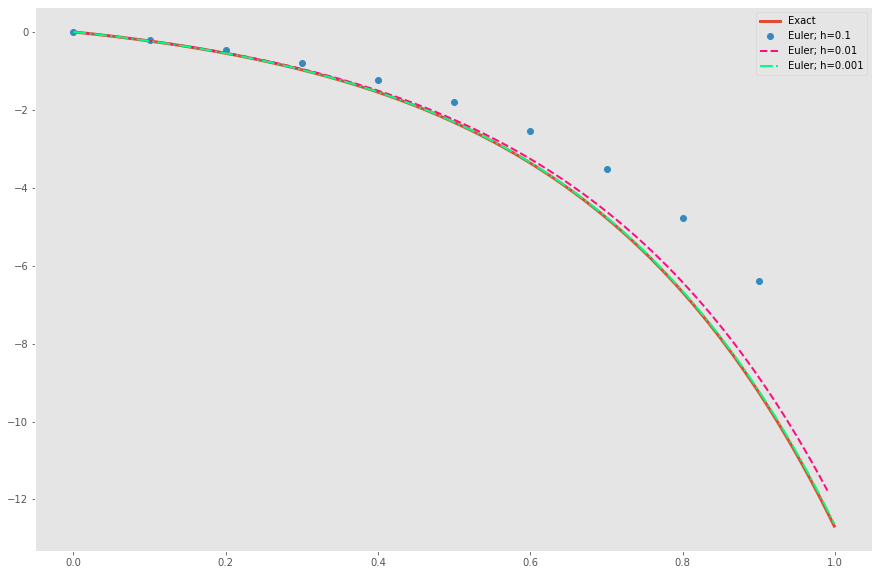

In [6]:
plt.figure(figsize=(15, 10))
plt.plot(t, y, lw=3, label="Exact")
plt.plot(t1, y1, "o", label="Euler; h=0.1")
plt.plot(t2, y2, "--", lw=2, c="#FF0C7E", label="Euler; h=0.01")
plt.plot(t3, y3, "-.", lw=2, c="#00FF7E", label="Euler; h=0.001")

plt.grid()
plt.legend()
plt.show()

# Heun's Method (2nd Order Runge-Kutta Method)

Heun's method is a modification on Euler's methos for solving DE. Here, instead of one step calculation as in Euler's method, there are two steps - The predictor step and the corrector step.
Let's consider the IVP as follows :
$$
y^\prime(t) = f(t, y(t)), \quad y(t_0) = y_0
$$
Using Heun's method, we first calculate the intermediate value $\tilde{y}_{i+1}$ (The predictor step), and then the final approximation $y_{i+1}$ at the next integration point. (The corrector step)

i.e, 

\begin{align}
\tilde{y}_{i+1} &= y_i + h\; f(t_i, y_i) &\text{(Predictor Step)} \\
y_{i+1} &= y_i + \frac{h}{2} \left[f(t_i, y_i) + f(t_{i+1}, \tilde{y}_{i+1})\right] &\text{(Corrector Step)}
\end{align}

Here $h$ is the time step and $t_{i+1} = t_i + h$. 

$\textbf{Problem :}$ Here we use the same problem we did in the first part, i.e, :
$$
y^\prime = 3y -2 \qquad y(0) = 0
$$

$\textbf{Solution :}$ As above, 
$$
f(t, y) = 3y - 2
$$
The implimetation of Heun's method for this problem is as follows:

In [7]:
def f(t, y):
    """
    The derivative function
    """
    return 3*y - 2

In [8]:
def Heun(t):
    """
    Solve the DE of the form dy/dt= f(t, y) 
    using Heun's method. 
    takes time as an array and returns solution y(t) for those values of t
    """
    
    h = t[1] - t[0]          # Time step 
    y = np.zeros_like(t)     # defining y array with same size as t but with all zeros
    y[0] = 0                 # initial condition
    
    for i in range(len(t) -1):
        ypred  = y[i] + h*f(t[i], y[i])     # The predictor step
        y[i+1] = y[i] + (h/2)*(f(t[i], y[i]) + f(t[i+1], ypred))  # The corrector step
    
    return y

Solving with different time steps:

In [9]:
t0 = 0
tf = 1

t1 = np.arange(t0, tf, 0.1)      # with h = 0.1
y1 = Heun(t1)

t2 = np.arange(t0, tf, 0.01)     # with h = 0.01
y2 = Heun(t2)

t3 = np.arange(t0, tf, 0.001)    # with h = 0.001
y3 = Heun(t3)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (2/3 * (1 - np.exp(3*t)))

t = np.arange(t0, tf, 0.001)
y = y_true(t)

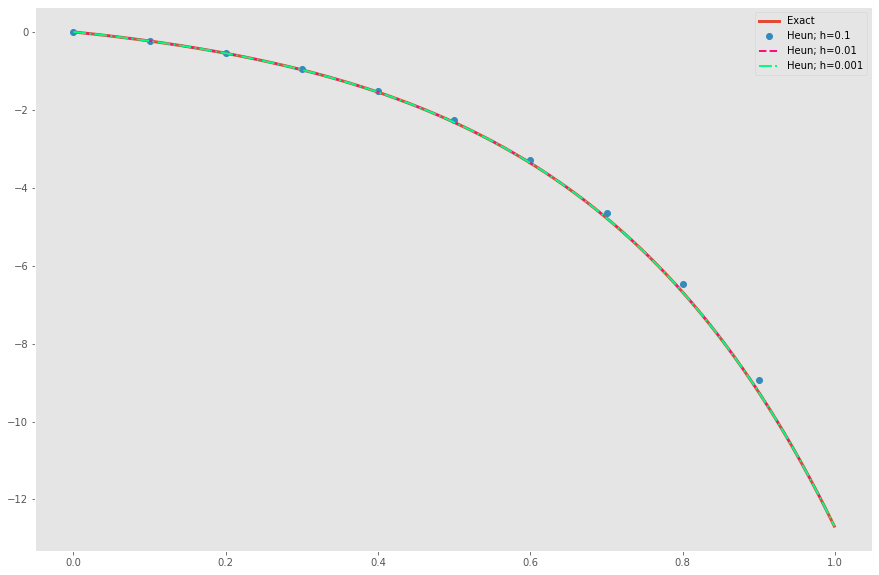

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(t, y, lw=3, label="Exact")
plt.plot(t1, y1, "o", label="Heun; h=0.1")
plt.plot(t2, y2, "--", lw=2, c="#FF0C7E", label="Heun; h=0.01")
plt.plot(t3, y3, "-.", lw=2, c="#00FF7E", label="Heun; h=0.001")

plt.grid()
plt.legend()
plt.show()

Which gives a better convergent for even a small value of h than Euler method.

# Runge-Kutta method  (4th order Runge-Kutta method)

When someone says about Runge-Kutta method, They say about 4th orde RK method. Consider the differential equation of the form (IVP):
$$
\frac{dy}{dt} = f(t, y) , \qquad y(t_0) = y_0
$$

we can start from initial condition $y_0$ at $t_0$, and iterate to find next values. In 4th order RK, given that $y_n$ at $t = t_n$, we can find the next value of $y$ (or $y_{n+1}$ ) at $t_{n+1}$ as follows : 

\begin{align}
y_{n+1} &= y_n + \frac{1}{6}h(k_1 + 2k_2 + 2k_3 + k_4),\\
t_{n+1} &= t_n + h
\end{align}

Where $h$ is the step size. the values of $k_i$'s are given by,

\begin{align}
k_1 &= f(t_n, y_n), \\[0.5em]
k_2 &= f\left(t_n+\frac{h}{2}, y_n+h\frac{k_1}{2}\right), \\[0.5em]
k_3 &= f\left(t_n+\frac{h}{2}, y_n+h\frac{k_2}{2}\right), \\[0.5em]
k_4 &= f(t_n+h, y_n+hk_3)
\end{align}

for further reading, [check this](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)

$\textbf{Problem :}$ Here we use the same problem we did in the first part, i.e, :
$$
y^\prime = 3y -2 \qquad y(0) = 0
$$

$\textbf{Solution :}$ Clearly, 
$$
f(t, y) = 3y - 2
$$

Given folwing is the code for 4th order RK method:

In [14]:
def f(t, y):
    return 3*y - 2


def RK4(t):
    """
    Solve the DE of the form dy/dt= f(t, y) 
    using Heun's method. 
    takes time as an array and returns solution y(t) for those values of t
    """
    
    h = t[1] - t[0]          # Time step 
    y = np.zeros_like(t)     # defining y array with same size as t but with all zeros
    y[0] = 0                 # initial condition
    
    for i in range(len(t) -1):
        
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h*k1/2)
        k3 = f(t[i] + h/2, y[i] + h*k2/2)
        k4 = f(t[i] + h, y[i] + h*k3)
        
        y[i+1] = y[i] + 1/6*h*(k1 + 2*k2 + 2*k3 + k4)
        # Why we dont update time step ?
    
    return y

In [15]:
t0 = 0
tf = 1

t1 = np.arange(t0, tf, 0.1)      # with h = 0.1
y1 = RK4(t1)

t2 = np.arange(t0, tf, 0.01)     # with h = 0.01
y2 = RK4(t2)

t3 = np.arange(t0, tf, 0.001)    # with h = 0.001
y3 = RK4(t3)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (2/3 * (1 - np.exp(3*t)))

t = np.arange(t0, tf, 0.001)
y = y_true(t)

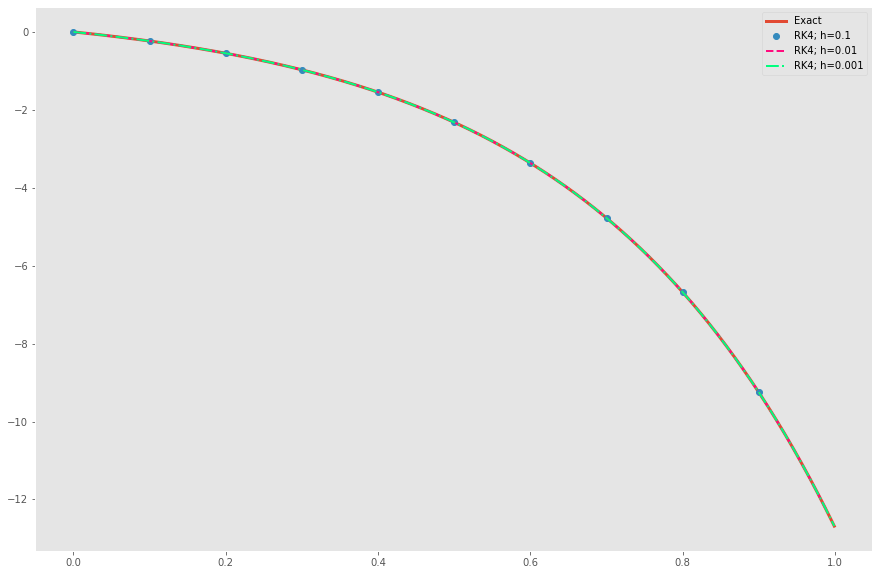

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(t, y, lw=3, label="Exact")
plt.plot(t1, y1, "o", label="RK4; h=0.1")
plt.plot(t2, y2, "--", lw=2, c="#FF0C7E", label="RK4; h=0.01")
plt.plot(t3, y3, "-.", lw=2, c="#00FF7E", label="RK4; h=0.001")

plt.grid()
plt.legend()
plt.show()

As you can see, Even the solution with time step $h=0.1$ is also results in a considerable accuracy. 

Lets take a look at the time of execution of each method (time step = 0.001) :

In [17]:
t_test = np.arange(0, 10, 0.001)

print("Euler's method statistics :")
%timeit Euler(t_test)
print()
print("Heun's method statistics :")
%timeit Heun(t_test)
print()
print("RK4 method statistics :")
%timeit RK4(t_test)

Euler's method statistics :
19.6 ms ± 855 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Heun's method statistics :
59.9 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

RK4 method statistics :
105 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


It is clear that RK4 takes a longer time. (this is expected since there are more number of calculations ~ roughly twice that of Heun's ~ in RK4). But even time step 0.1 is also a good choice for RK4.

$\color{red}{WARNING !}$ This algorithms are designed for an understanding of how these methods work, and is very slow for using in actual codes, because it depends heavily on bare python loops. we will discuss about optimizations later.

## Example -  1

$$
\frac{dy}{dx} = -2 y + sin(t), \\[0.5 em]
y(0) = 0
$$

This is also a linear DE of first order, and can be solved by hand. Here we use sympy:

In [23]:
# setting up variables
t = sy.var("t")
y = sy.Function("y")

# defining differential equation
eq = sy.Eq(sy.Derivative(y(t), t), -2*y(t) + sy.sin(t))

IC = {y(0) : 0}                       # Appliying initial condition
sol = sy.dsolve(eq, y(t), ics=IC)     # Solving DE

sol

Eq(y(t), (2*exp(2*t)*sin(t)/5 - exp(2*t)*cos(t)/5 + 1/5)*exp(-2*t))

We can use the same functions we used above for calculations. so we are not going to define it here. We only define the function $f(t, y)$

In [24]:
def f(t, y):
    return -2*y + np.sin(t)

We take time step of 0.1 and check for different algorithm with exact result :

In [25]:
t0 = 0
tf = 10
t = np.arange(t0, tf, 0.1)

y_euler = Euler(t)
y_heun  = Heun(t)
y_rk4   = RK4(t)

def y_true(t):                   # exact soln
    """
    analytical solution obtained by sympy
    """
    
    return (1/5 + 2*np.exp(2*t)*np.sin(t)/5 - np.exp(2*t)*np.cos(t)/5) * np.exp(-2*t)

t_exact = np.arange(t0, tf, 0.001)
y_exact = y_true(t_exact)

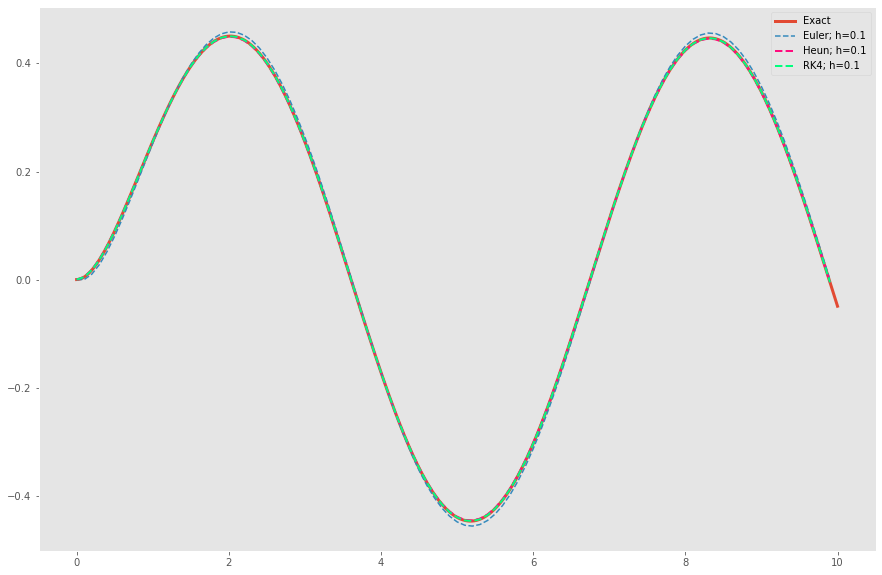

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(t_exact, y_exact, lw=3, label="Exact")
plt.plot(t, y_euler, "--", label="Euler; h=0.1")
plt.plot(t, y_heun, "--", lw=2, c="#FF0C7E", label="Heun; h=0.1")
plt.plot(t, y_rk4, "--", lw=2, c="#00FF7E", label="RK4; h=0.1")

plt.grid()
plt.legend()
plt.show()

## Example- 2

$$
\frac{dy}{dx} = -2 y^2 + 3y + sin(t), \\[0.5 em]
y(0) = 0
$$

This is a non - linear DE, and hence the exact solution is not possible. Still, we can solve it using the same mehod we discussed above, without even changing the algorithm.

In [35]:
# We define the function f(t, y)
def f(t, y):
    return -2*y**2 + 3*y + np.sin(t)

In [36]:
t0 = 0
tf = 1
t = np.arange(t0, tf, 0.1)

y_euler = Euler(t)
y_heun  = Heun(t)
y_rk4   = RK4(t)

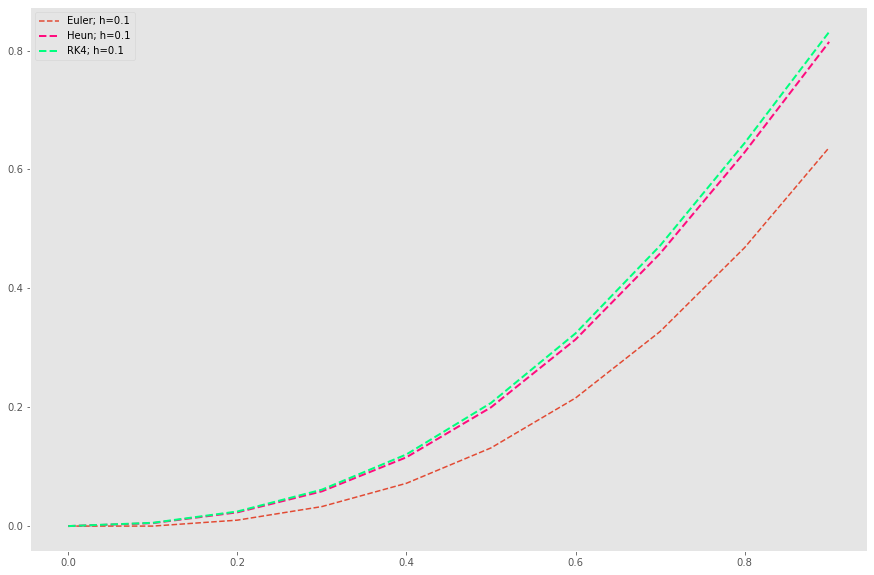

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(t, y_euler, "--", label="Euler; h=0.1")
plt.plot(t, y_heun, "--", lw=2, c="#FF0C7E", label="Heun; h=0.1")
plt.plot(t, y_rk4, "--", lw=2, c="#00FF7E", label="RK4; h=0.1")

plt.grid()
plt.legend()
plt.show()